# Quiz 7.1  

An electric company is trying to determine the electrical energy needs for the residential customers in its service territory. By identifying certain customer and environmental characteristics, the utility hopes to build a multiple regression model for $Y$, the monthly kilowatthour usage. The independent variables under consideration are  

$X_1 =$ Square feet of living space  

$X_2 =$ Average monthly temperature  

$X_3 =$ Age of residence  

$X 4 =$ Proportion of available sunshine hours  

The data file is stored in https://s3-us-west-2.amazonaws.com/dsci/6002/data/elec.csv  

1) Using backward stepwise regression, build a model to describe electricity usage.  

2) Test if the linear regression assumptions are met.  

In [14]:
%pylab inline

import pandas as pd
import seaborn as sns
import yaml
from statsmodels.graphics.gofplots import qqplot
from sqlalchemy import create_engine
import statsmodels.api as sms


from statsmodels.stats.diagnostic import het_breushpagan
from statsmodels.graphics.correlation import plot_corr
from statsmodels.graphics.regressionplots import plot_leverage_resid2

df = pd.read_csv("https://s3-us-west-2.amazonaws.com/dsci/6002/data/elec.csv")
df = df.dropna(axis=0)

print(df.columns)

df.head()

Populating the interactive namespace from numpy and matplotlib
Index(['y', 'x1', 'x2', 'x3', 'x4'], dtype='object')


,y,x1,x2,x3,x4
0,1805,950,35,31,0.24
1,1029,1600,41,27,0.29
2,1020,2100,48,30,0.31
3,515,1055,52,29,0.39
4,942,1250,60,18,0.40


In [4]:
X2 = df[['x1', 'x2', 'x3', 'x4']]
X2 = sm.add_constant(X2)
y2 = df['y']

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     12.04
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           4.83e-05
Time:                        13:31:53   Log-Likelihood:                -177.49
No. Observations:                  24   AIC:                             365.0
Df Residuals:                      19   BIC:                             370.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -177.3477    482.664     -0.367      0.717     -1187.575   832.880
x1             0.6625      0.125      5.291      0.000         0.400     0.925
x2            -8.0370     11.107     -0.724      0.478       -31.285    15.211
x3            -3.0830     11.615     -0.265      0.794       -27.394    21.228
x4          2335.6939   1237.745      1.887      0.075      -254.937  4926.325
==============================================================================
Omnibus:                       13.481   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.357
Skew:                           1.482   Prob(JB):                      0.00207
Kurtosis:                       4.890   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# drop x3 first, the drop x2 - based on highest p-value

X2 = df[['x1', 'x4']]
X2 = sm.add_constant(X2)
y2 = df['y']

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     25.19
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           2.64e-06
Time:                        13:42:15   Log-Likelihood:                -177.96
No. Observations:                  24   AIC:                             361.9
Df Residuals:                      21   BIC:                             365.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -407.6312    306.489     -1.330      0.198     -1045.010   229.748
x1             0.6659      0.111      6.005      0.000         0.435     0.897
x4          1636.8710    537.970      3.043      0.006       518.102  2755.640
==============================================================================
Omnibus:                       11.393   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.572
Skew:                           1.355   Prob(JB):                      0.00835
Kurtosis:                       4.493   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

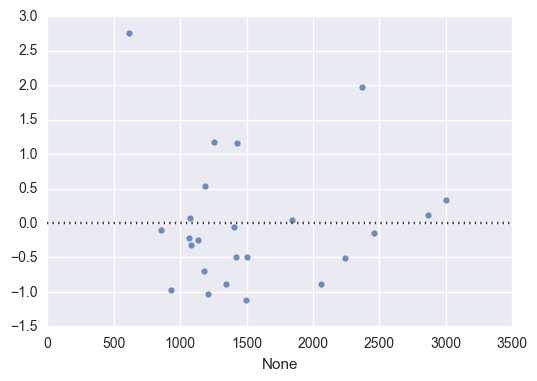

In [18]:
sns.residplot(results2.fittedvalues, results2.resid_pearson, df);

# yes, fulfills the linearlity assumption

/Users/justin/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


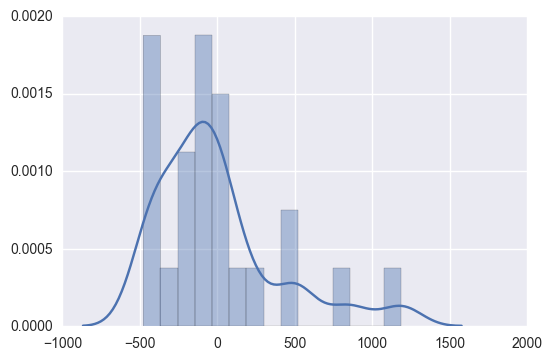

In [28]:
res1 = results2.resid
# hist(res1, bins = 20);

sns.distplot(res1, bins=15);

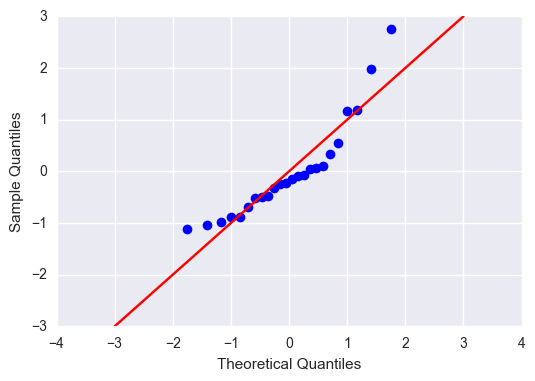

In [20]:
sres1 = results2.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

does not fulfill normality assumption

In [24]:
het_breushpagan(results2.resid, results2.model.exog)

(1.1183396450197218,
 0.57168346564738659,
 0.51318680945944795,
 0.6059001749289652)

In [29]:
het_breushpagan?

based on the results2 test, the p-value is 0.57168, so we reject the null hypothesis, and so we have evidence to suggest that there is constant variance.

Hence, the model fulfills the Homoscedasticity assumption.

The p-value of 0.77 is greater than 0.05, so we would reject heteroskedasticity.

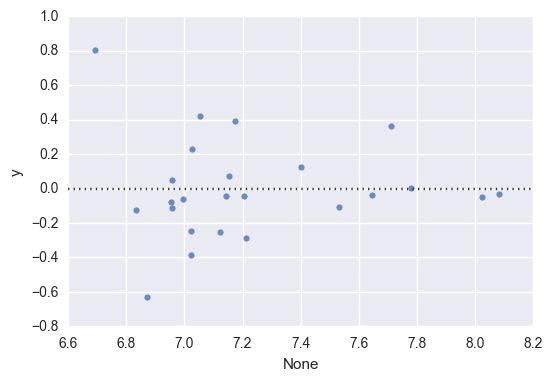

In [22]:
log_y2 = np.log(y2)
model2_log = sms.OLS(log_y2, X2)
results2_log = model2_log.fit()

sns.residplot(results2_log.fittedvalues, log_y2, df);